In [74]:
import numpy as np
from matplotlib import pyplot as plt

deg = 180 / np.pi

In [113]:
ki = np.array([0.,1.,0.]).reshape(3,1)
m = np.array([0., 0., 1.]).reshape(3,1)

Sigma_D = np.diag([1., 0.1, 1.]) * 2 * deg
Sigma_M = np.diag([1., 1., 1.]) * 1 * deg

kf = np.random.rand(3,1)

ki /= np.linalg.norm(ki)
kf /= np.linalg.norm(kf)

if kf.transpose().dot(ki).trace() < 0:
    kf = -kf

q = kf-ki

e1 = np.cross(kf.reshape(3), ki.reshape(3)).reshape(3,1)
e2 = np.cross(kf.reshape(3), e1.reshape(3)).reshape(3,1)
e3 = kf+ki

e1 /= np.linalg.norm(e1)
e2 /= np.linalg.norm(e2)
e3 /= np.linalg.norm(e3)


A = kf.dot(ki.transpose()) - np.identity(3)
AAT = A.dot(A.transpose())

Sigma = Sigma_M + A.dot(Sigma_D).dot(A.transpose())

a = np.cross(e1.reshape(3), q.reshape(3)).reshape(3,1)

#J = np.array([e1.reshape(3), e2.reshape(3), a.reshape(3)]).transpose()
J = np.array([e1.reshape(3), e2.reshape(3), e3.reshape(3)]).transpose()
JI = np.linalg.inv(J)

Sigma_eps = JI.dot(Sigma).dot(JI.transpose())

print(np.arccos(kf.transpose().dot(ki).trace()) * deg)

57.35508833400596


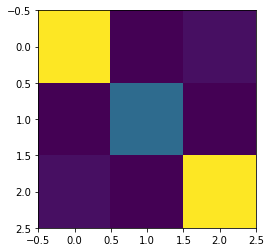

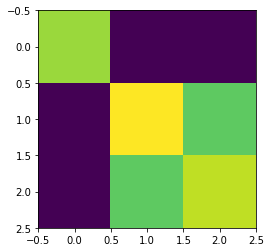

[[1.71887339e+02 2.06184479e-14 3.62749199e-14]
 [3.34063230e-14 2.02742629e+02 1.52282229e+02]
 [1.96274996e-14 1.52282229e+02 1.83150249e+02]]



In [114]:
plt.imshow(Sigma)
plt.show()

plt.imshow(Sigma_eps)
plt.show()

print(Sigma_eps)

print()

In [118]:
B = np.array([kf.reshape(3), ki.reshape(3), e1.reshape(3)]).transpose()
BI = np.linalg.inv(B)

print(BI.dot(AAT).dot(B))

[[ 1.46056902e+00 -4.60569019e-01 -2.12714451e-16]
 [-1.00000000e+00  4.60569019e-01  1.35987330e-16]
 [ 3.07500843e-17  1.46946554e-18  1.00000000e+00]]


In [119]:
1-kf.transpose().dot(ki)

array([[0.46056902]])

In [120]:
eps = 1 - kf.transpose().dot(ki).trace()

w, u = np.linalg.eig(AAT)
print(w)

w1 = 0.5 + eps + 0.5*np.sqrt(1+4*eps)
w2 = 0.5 + eps - 0.5*np.sqrt(1+4*eps)

print(w1, w2)

[1.80352158 1.         0.11761646]
1.8035215790934265 0.1176164585849403


In [121]:
u.transpose().dot(J)

array([[-2.99367892e-16,  7.23456020e-01,  2.58513856e-01],
       [ 1.00000000e+00,  8.08622368e-17,  1.77114439e-16],
       [-2.79681305e-17, -6.90370471e-01,  9.66007550e-01]])

In [122]:
w, u = np.linalg.eig(A.dot(Sigma_D).dot(A.transpose()))
print(w)

print(u)

[122.88022606 114.59155903   2.26679735]
[[ 6.79423048e-01 -7.33318447e-01  2.50674534e-02]
 [-3.68701198e-02 -8.73172281e-17  9.99320066e-01]
 [ 7.32819839e-01  6.79885325e-01  2.70375390e-02]]


In [123]:
A.dot(Sigma_D).dot(A.transpose())

array([[118.34715536,  -3.02141574,   4.05075381],
       [ -3.02141574,   2.43075994,  -3.25887296],
       [  4.05075381,  -3.25887296, 118.96066714]])

In [124]:
e2.transpose().dot(ki).trace()

-0.8420298192842572